In [120]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [121]:
b_data = pd.read_csv("Bs.csv", header=None)
p_data = pd.read_csv("Ps.csv", header=None)

In [122]:
b_data['isB'] = 1
b_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,isB
0,4,2,5,4,4,8,7,6,6,7,6,6,2,8,7,10,1
1,5,9,7,7,10,9,8,4,4,6,8,6,6,11,8,7,1
2,3,3,3,4,3,7,7,5,5,7,6,6,5,8,5,10,1
3,5,9,7,7,7,8,8,3,6,10,5,6,3,7,6,8,1
4,4,2,5,4,4,7,7,5,6,7,6,6,2,8,7,10,1


In [123]:
p_data['isB'] = 0
p_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,isB
0,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8,0
1,8,14,7,8,4,5,10,6,3,12,5,4,4,10,4,8,0
2,6,10,8,8,7,8,5,7,5,7,6,6,3,9,8,9,0
3,7,11,10,8,6,6,11,3,6,13,6,3,0,10,3,8,0
4,6,10,6,6,4,7,10,5,2,11,5,4,4,11,5,7,0


In [124]:
merged_data = p_data.append(b_data,ignore_index=True)

In [125]:
merged_data.shape

(1569, 17)

In [126]:
merged_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,isB
0,3,6,4,4,2,4,14,8,1,11,6,3,0,10,4,8,0
1,8,14,7,8,4,5,10,6,3,12,5,4,4,10,4,8,0
2,6,10,8,8,7,8,5,7,5,7,6,6,3,9,8,9,0
3,7,11,10,8,6,6,11,3,6,13,6,3,0,10,3,8,0
4,6,10,6,6,4,7,10,5,2,11,5,4,4,11,5,7,0


In [127]:
X = merged_data.drop('isB', axis=1)
y = merged_data['isB']

In [128]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

In [129]:
y_test.value_counts()

1    158
0    156
Name: isB, dtype: int64

In [130]:
y_train.value_counts()

0    647
1    608
Name: isB, dtype: int64

## Lets Try With Linear Kernel and default C

In [131]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [132]:
y_pred = svclassifier.predict(X_test)


In [133]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[152   4]
 [  4 154]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       156
           1       0.97      0.97      0.97       158

    accuracy                           0.97       314
   macro avg       0.97      0.97      0.97       314
weighted avg       0.97      0.97      0.97       314



## Linear Kernel

In [134]:
# C is the SVM regularization parameter 
C_values = [0.0001, 0.001, 0.01, 0.1, 1, 10, 100] 

#Let's create a validation set
X_train_val, X_test_val, y_train_val, y_test_val = train_test_split(X_train, y_train, test_size = 0.25)



accuracies = []
for C in C_values:
    svc = SVC(kernel ='linear', C = C)
    svc.fit(X_train_val, y_train_val)
    y_pred_val = svc.predict(X_test_val)
    print(confusion_matrix(y_test_val,y_pred_val))
    print(classification_report(y_test_val,y_pred_val))
    accuracies.append(accuracy_score(y_test_val,y_pred_val))


[[148  14]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      0.91      0.95       162
           1       0.92      1.00      0.96       152

    accuracy                           0.96       314
   macro avg       0.96      0.96      0.96       314
weighted avg       0.96      0.96      0.96       314

[[152  10]
 [  0 152]]
              precision    recall  f1-score   support

           0       1.00      0.94      0.97       162
           1       0.94      1.00      0.97       152

    accuracy                           0.97       314
   macro avg       0.97      0.97      0.97       314
weighted avg       0.97      0.97      0.97       314

[[155   7]
 [  1 151]]
              precision    recall  f1-score   support

           0       0.99      0.96      0.97       162
           1       0.96      0.99      0.97       152

    accuracy                           0.97       314
   macro avg       0.97      0.98      0.97       314
weigh

In [135]:
accuracies

[0.9554140127388535,
 0.9681528662420382,
 0.9745222929936306,
 0.9840764331210191,
 0.9808917197452229,
 0.9777070063694268,
 0.9808917197452229]

### I have seperated the graphs for the sake of simplict.

```The first graph shows the C values: 0.0001, 0.001, 0.01, 0.1
The second graph shows the C values: 1, 10, 100
The last one shows all of them: 0.0001, 0.001, 0.01, 0.1, 1, 10, 100```

Text(0.5, 1.0, 'C / accuracy')

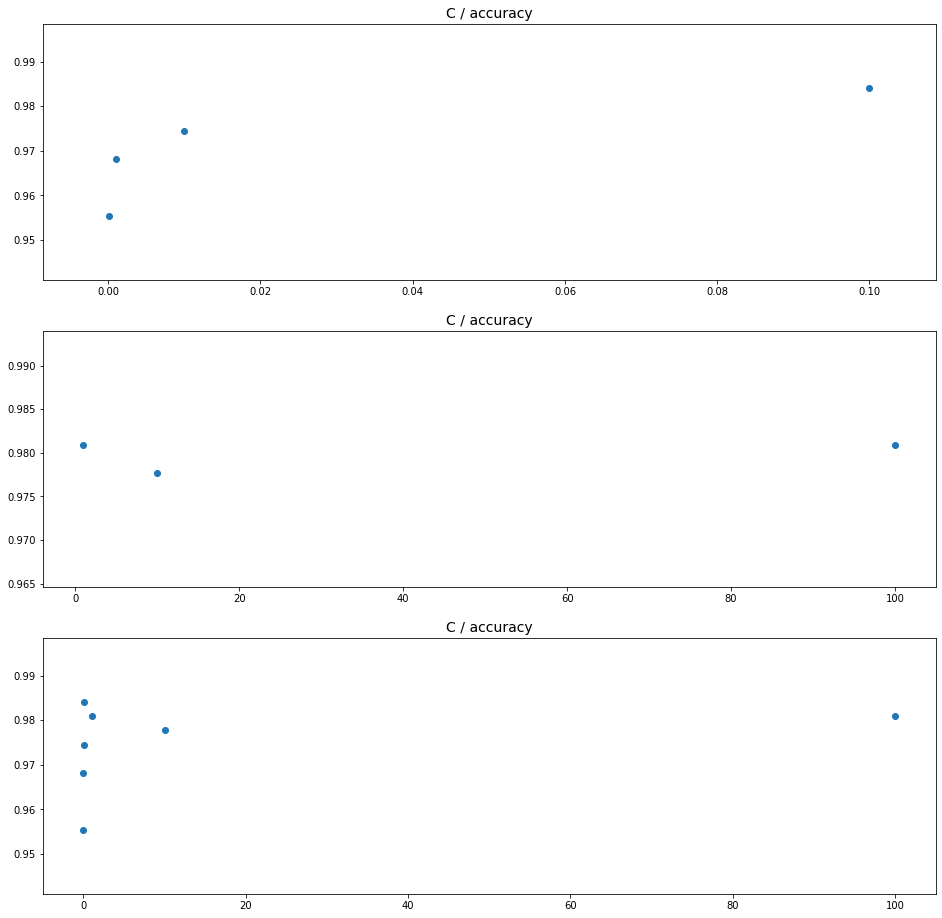

In [136]:
fig, ax = plt.subplots(3,1, figsize=(16, 16))
#fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
ax[0].scatter(C_values[:4], accuracies[:4]);
ax[0].set_title('C / accuracy', size=14)
ax[1].scatter(C_values[4:7], accuracies[4:7]);
ax[1].set_title('C / accuracy', size=14)
ax[2].scatter(C_values, accuracies);
ax[2].set_title('C / accuracy', size=14)

# Re-train a model using the best C value and run it on the test set. 
``` Best C values: 0.1
Validation accuracy: 0.9840764331210191```

In [146]:
svclassifier = SVC(kernel='linear', C = 0.1)
svclassifier.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[152   4]
 [  6 152]]
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       156
           1       0.97      0.96      0.97       158

    accuracy                           0.97       314
   macro avg       0.97      0.97      0.97       314
weighted avg       0.97      0.97      0.97       314



In [147]:
print(accuracy_score(y_test,y_pred))

0.9681528662420382


### Accuracy with C=0.1 on the test set: 0.9681528662420382


In [145]:
np.savetxt("Decisions_Linear_Kernel.txt", y_pred, fmt='%d')